<a href="https://colab.research.google.com/github/nibekasov/Econometrics/blob/main/TS/TS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# start
rm(list=ls())
#setwd('/NGC-DL-CONTAINER-LICENSE')
install.packages("zoo")
install.packages("mFilter")
install.packages("forecast")
library(zoo)
library(mFilter)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
install.packages("fpp2")
library(fpp2)
install.packages("devtools")
library(devtools)
install.packages("broom")
library(broom)
install.packages("stargazer")
library(stargazer)
install.packages("tidyr")
library(tidyr)
install.packages("dynlm")
library(dynlm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘expsmooth’, ‘fma’


── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.4.1     ✔ expsmooth 2.3  
✔ fma       2.4       

── Conflicts ───────────────────────────────────────────────── fpp2_conflicts ──
✖ Ecfun::BoxCox() masks forecast::BoxCox()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgd

In [ ]:

install.packages("writexl")
library(writexl)
install.packages("Ecdat")
library("Ecdat") 
install.packages("gdata")
library("gdata")
install.packages("rugarch")
library("rugarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pracma’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘DEoptimR’, ‘pcaPP’, ‘fds’, ‘deSolve’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘fda’, ‘tis’, ‘jpeg’, ‘TeachingDemos’, ‘BMA’, ‘mvtnorm’, ‘Ecfun’


Loading required package: Ecfun


Attaching package: ‘Ecfun’


The following object is masked from ‘package:forecast’:

    BoxCox


The following object is masked from ‘package:base’:

    sign



Attaching package: ‘Ecdat’


The following object is masked from ‘package:datasets’:

    Orange


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gtools’


gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.



gdata: Unable to load perl li

вывы
вывы

выв

ывы
ы


Call:
tslm(formula = unemp_b ~ trend + 1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.157692 -0.101224 -0.004196  0.086888  0.154196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.963636   0.072155   68.79 1.03e-14 ***
trend       0.194056   0.009804   19.79 2.37e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1172 on 10 degrees of freedom
Multiple R-squared:  0.9751,	Adjusted R-squared:  0.9726 
F-statistic: 391.8 on 1 and 10 DF,  p-value: 2.375e-09


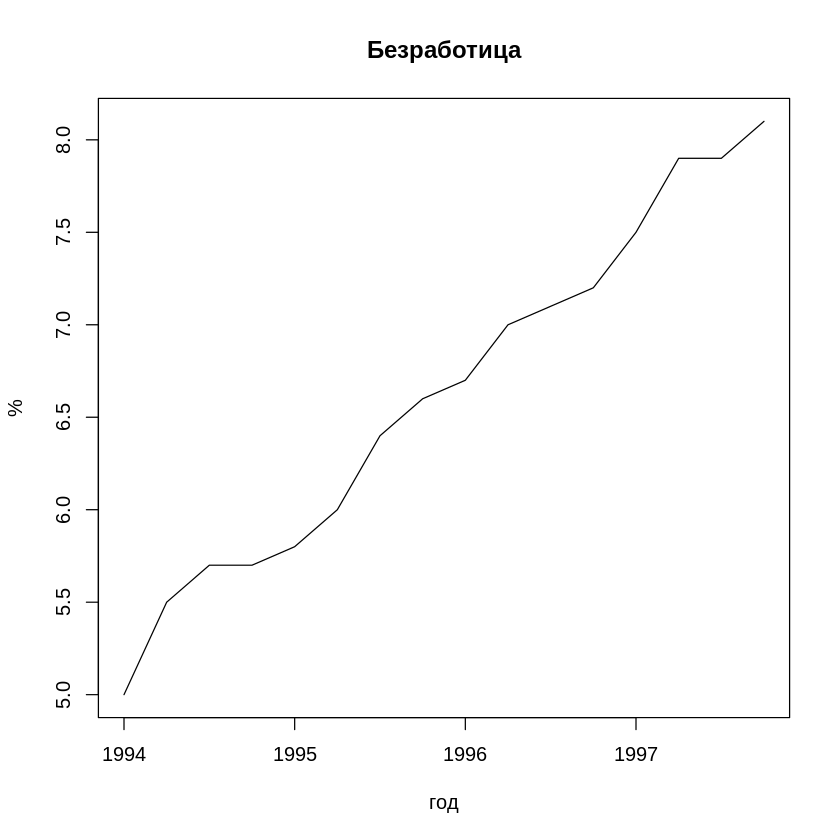

In [ ]:

###############################################################
# Пример 5.1.11 из книги В.П. Носко
###############################################################
# Лекция 1, слайды 86-92
###############################################################
rm(list=ls())
# загружаем данные в формате csv - команда read.csv("название.csv")
# header - опция команды, использовать ли первую строку как название
# да/нет - TRUE/FALSE
x = read.csv("RU_unemp.csv", header = TRUE)
# as.yearqtr - переводит объект x$time из текстового формата в формат веремени
# для корректной работы требуется указать формат текстовой записи даты 
x$quarter = as.yearqtr(x$time,format="%YQ%q")

# можно просто загрузить столбец unemp в качестве временного ряда,
# но тогда надо руками указать начало, конец и частотность (в год) данных
unemp <-ts(x$unemp, start = c(1994,1), end =c(1997,4), frequency = 4)

# простой график для временного ряда
ts.plot(unemp, main="Безработица", xlab = "год", ylab ="%")

# создаем укороченый временной период, на котором будут оцниваться коэффициенты
unemp_b <- ts(x$unemp, start=c(1994, 1), end=c(1996, 4), frequency=4)
#quarter_b <- ts(x$quarter, start=c(1994, 1), end=c(1996, 4), frequency=4)

# оставшиеся наблюдения используются для сравнения прогнозных качеств моделей
# [time(unemp) >= 1997] - это проверяемое условие,
# опция start в качестве условия не сработает - это приписываемое начало ряда
unemp_s <-ts(unemp[time(unemp) >= 1997], start=c(1997, 1), end=c(1997, 4), frequency=4)
#quarter_s <- ts(quarter, start=c(1997, 1), end=c(1997, 4), frequency=4)

# Это фактически OLS, tslm позволяет включить тренд без создания отдельной переменной
# trens - это тренд
# + 1 это константа
unemp_ols <- tslm(unemp_b ~ trend  + 1)
# посмотреть на таблицу результатов можно командой summary
summary(unemp_ols)

In [ ]:
# для lm- linear model потребовалось бы создать t 
t <-1:length(unemp_b) 
# теперь можно сделать OLS (перезапишем объект)
unemp_ols_l <- lm(unemp_b ~ t  + 1)
summary(unemp_ols_l)
# вывод результатов lm можно делать командой stargazer
stargazer(unemp_ols_l, type = "text")
# сохранение результатво в csv
write.csv(tidy(unemp_ols), "table_ols.csv")


Call:
lm(formula = unemp_b ~ t + 1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.157692 -0.101224 -0.004196  0.086888  0.154196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.963636   0.072155   68.79 1.03e-14 ***
t           0.194056   0.009804   19.79 2.37e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1172 on 10 degrees of freedom
Multiple R-squared:  0.9751,	Adjusted R-squared:  0.9726 
F-statistic: 391.8 on 1 and 10 DF,  p-value: 2.375e-09



                        Dependent variable:    
                    ---------------------------
                              unemp_b          
-----------------------------------------------
t                            0.194***          
                              (0.010)          
                                               
Constant                     4.964***          
                              (0.072)          
                                               
-----------------------------------------------
Observations                    12             
R2                             0.975           
Adjusted R2                    0.973           
Residual Std. Error       0.117 (df = 10)      
F Statistic           391.790*** (df = 1; 10)  
Note:               *p<0.1; **p<0.05; ***p<0.01


Warning message:
“The `tidy()` method for objects of class `tslm` is not maintained by the broom team, and is only supported through the `lm` tidier method. Please be cautious in interpreting and reporting broom output.

This warning is displayed once per session.”


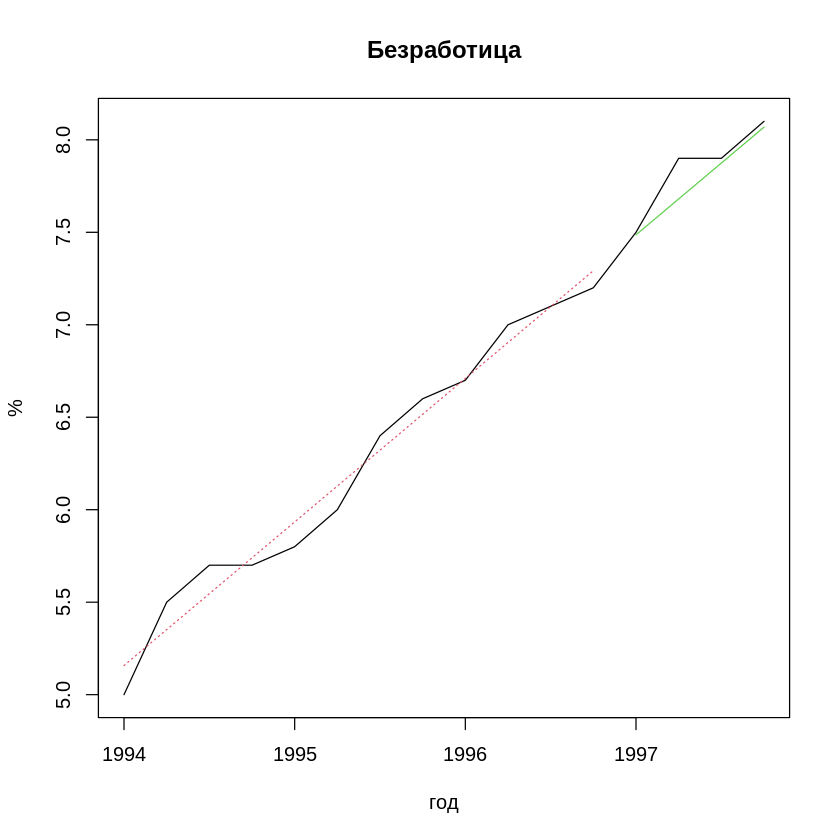

In [ ]:


ts.plot(unemp, main="Безработица", xlab = "год", ylab ="%")
# ПРОГНОЗИРОВАНИЕ
# OLS
# для прогнозирования нужен tslm объект
# команда forecast(используемые оценки tslm, h = число шагов)
unemp_ols_f <- ts(forecast(unemp_ols, h=4))
# добавим на график прогноз $mean
lines(unemp_ols_f$mean, col = 3)
# добавим на график предсказанные значения на базовом периоде
lines(unemp_ols$fitted.values, lty = 3,  col = 2)

In [ ]:
#@title Текст заголовка по умолчанию
# видно совпадение линий, действиетльно прогноз - продолжение подобраной прямой
# определим ошибку прогноза
r_ols <-  unemp_s - unemp_ols_f$mean 
r_ols

,Qtr1,Qtr2,Qtr3,Qtr4
1997,0.01363636,0.21958042,0.02552448,0.03146853


# SSE

In [ ]:
# Простое экспоненциальное сглаживание - команда ses
# ses(базовый временной ряд, h = число шагов прогнозирования, alpha = значение или NULL для автовыбора)
# https://www.rdocumentation.org/packages/forecast/versions/8.13/topics/ses
unemp_ses <- ses(unemp_b, h= 4, alpha = NULL)
# определим ошибку прогноза
r_ses <-  unemp_s - unemp_ses$mean 
r_ses

,Qtr1,Qtr2,Qtr3,Qtr4
1997,0.30001,0.70001,0.70001,0.90001


In [ ]:


# Holt 
# Метод Хольта задается командой HoltWinters без сезонности (gamma = FALSE)
#HoltWinters(базовый временной ряд, alpha = уровень, beta = наклон, gamma = сезонность)
# после равно ставятся значения или NULL для автовыбора, FALSE - отключает параметр
# AAN - ETS классификация
holtwinter_AAN <- HoltWinters(unemp_b, alpha = NULL, beta = NULL, 
                              gamma = FALSE)

In [ ]:
# создается прогноз по объекту holtwinter_AAN на h= 4 шага вперед 
unemp_Holt <- ts(forecast(holtwinter_AAN, h=4))
# определим ошибку прогноза
r_Holt <-  unemp_s - unemp_Holt$mean
r_Holt



,Qtr1,Qtr2,Qtr3,Qtr4
1997,0.1989573,0.4979145,0.3968718,0.4958290


In [ ]:
# Метод Хольта- Винтерса задается той же командой 
# seasonal = "add" - указывает на аддитивную сезонность
# AAA - ETS классификация
holtwinter_AAA <- HoltWinters(unemp_b, alpha = NULL, beta = NULL, 
                              gamma = NULL, seasonal = "add")
# создается прогноз
unemp_HW <- ts(forecast(holtwinter_AAA, h=4))
# определим ошибку прогноза
r_HW <-  unemp_s - unemp_HW$mean
r_HW

,Qtr1,Qtr2,Qtr3,Qtr4
1997,0.15894683,0.38260950,0.04159968,0.17336804


In [ ]:


###########################################
# Вычисление параметров прогноза на основании ошибок
# Надо прогнать 4 раза
# для OLS
r <- r_ols
unemp_hat <-  unemp_s - r
# для Хольта: 
# r <- r_Holt 
# для Хольта-Винтерса
# r <- r_HW

# Residuals
r
# Sum of Squared Residuals
SSE <- sum(r^2)
SSE

# Root Mean Squared Error (RMSE)
RMSE <- sqrt(sum(r^2) / length(r))
RMSE

# Mean Absolute Error
MAE <- sum(abs(r)) / length(r)
MAE

# Mean Absolute Percentage Error
MAPE <- 100* sum(abs(r/unemp_s)) / length(r)
MAPE

# Theil Inequality Coefficient (TIC)
TIC <- sqrt(sum(r^2))/(sqrt(sum(unemp_s^2))  + sqrt(sum(unemp_hat^2)))
TIC

# повтор расчетов параметров ошибок для других прогнозов


,Qtr1,Qtr2,Qtr3,Qtr4
1997,0.01363636,0.21958042,0.02552448,0.03146853


[1] 0.05004328

[1] 0.1118518

[1] 0.07255245

[1] 0.918228

[1] 0.007154622

In [ ]:
###########################################
# Графики

# сравнение  прибижения 
# команда jpeg нужна для автосохранения графиков в директорию
jpeg("unemp.jpg", width = 500, height = 350)
ts.plot(unemp_s, main="Безработица", xlab = "год", ylim=c(7.0,8.6),
        ylab ="%", col = 1, lwd = 2)
lines(unemp_ols_f$mean, col = 2, lty = 3, lwd = 2)
lines(unemp_Holt$mean, col = 3, lty = 3, lwd = 2)
lines(unemp_HW$mean, col = 4, lty = 3, lwd = 2)
lines(unemp_ses$mean, col = 7, lty = 3, lwd = 2)
legend(x = "topleft",   legend = c("наблюдаемые", "МНК", "Хольт", "Хольт-Винтерс", "SSE"),  
       lty = c(1, 3, 3, 3, 3),  
       col = c(1, 2, 3, 4, 7),  
       lwd = 2) 
# dev.off() сбрасывает настройки, создаваемые командами по работе с графиками 
dev.off()



png 
  2

In [ ]:





###############################################################
# Пример 2.2 из книги Enders
###############################################################
# Лекция 2, слайды 35-36
###############################################################

# ARMA сравнение моделей
rm(list=ls())

# загрузить данные
data = read.csv("SIMS2.csv", header = TRUE)
Y1 = data[,"Y1"]

# Модель 1
# arfimaspec задает спецификацию моделей ARFIMA -
# Autoregressive fractionally integrated moving average 
# Частично интегрированной модели авторегрессии - скользящего среднего
# Отличие от ARIMA(p,d,q) в том, что d - интегрированность может быть не целым числом
# arfimaspec(mean.model=list(описание модели))
# armaOrder=c(p,q),
# include.mean - включать ли  средене
# arfima - включать ли интегрированность (по умолчанию нет) 
# external.regressors  - включать ли другие регрессиоры (по умолчанию да), но у нас их нет
# зададим AR(1), т.е. ARMA(1,0) или ARFIMA(1,0,0)
spec.ar1 = arfimaspec(mean.model=list(armaOrder=c(1,0),
                                      include.mean=FALSE,
                                      arfima=FALSE))

In [ ]:


# оценим модель AR(1)
fit.ar1 = arfimafit(spec=spec.ar1,data=Y1)
# результаты оценки
fit.ar1



*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
ar1     0.79047    0.061947   12.760        0
sigma   0.92449    0.065371   14.142        0

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
ar1     0.79047    0.069325   11.402        0
sigma   0.92449    0.062036   14.902        0

LogLikelihood : -134.0424 

Information Criteria
------------------------------------
                   
Akaike       2.7208
Bayes        2.7730
Shibata      2.7201
Hannan-Quinn 2.7419

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                        statistic p-value
Lag[1]                      1.077  0.2994
Lag[2*(p+q)+(p+q)-1][2]     1.077  0.6929
Lag[4*(p+q)+(p+q)-1][5]     1.161  0.9199

H0 : No serial correlation

Weighted L


Autocorrelations of series ‘res.ar1’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.102  0.002  0.004 -0.032 -0.044  0.090 -0.091  0.174  0.065 -0.027 
    11     12     13     14     15     16     17     18     19     20 
 0.175 -0.040 -0.151 -0.059  0.126  0.004  0.058 -0.076  0.033 -0.007 

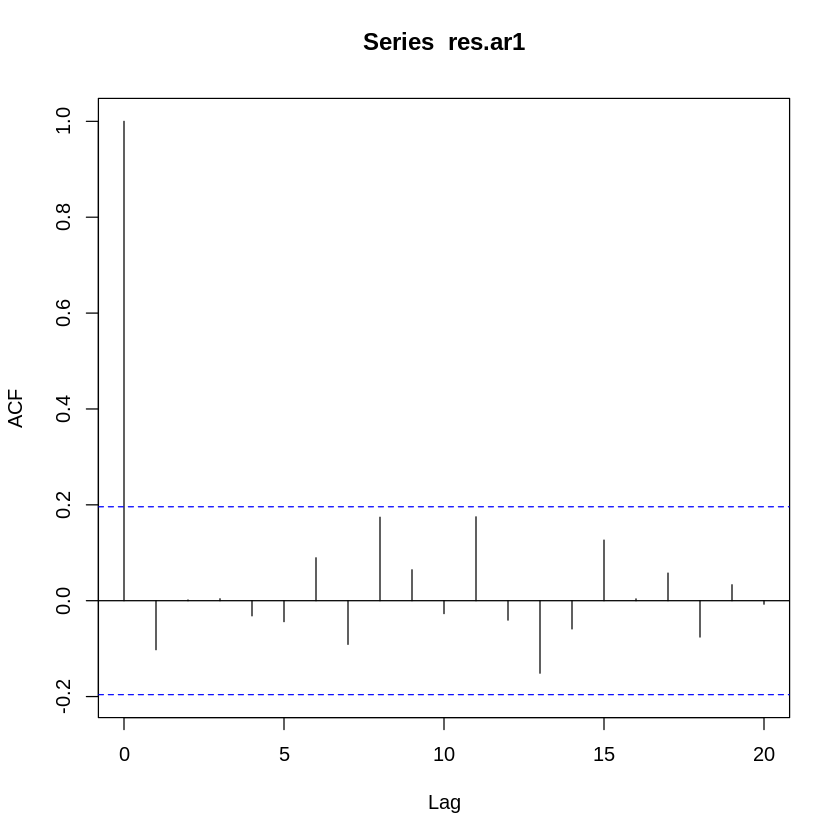

In [ ]:

# остатки
res.ar1 = fit.ar1@fit$residuals

# строим ACF 
res.acf1 = acf(res.ar1)
res.acf1


In [ ]:

# тест Ljung-Box для 8, 16 и 24 лагов (больше не надо, так как T/4 = 25)
Box.test(res.ar1,lag=8,type="Ljung-Box")
Box.test(res.ar1,lag=16,type="Ljung-Box")
Box.test(res.ar1,lag=24,type="Ljung-Box")



	Box-Ljung test

data:  res.ar1
X-squared = 6.5297, df = 8, p-value = 0.5881



	Box-Ljung test

data:  res.ar1
X-squared = 15.786, df = 16, p-value = 0.468



	Box-Ljung test

data:  res.ar1
X-squared = 21.983, df = 24, p-value = 0.5803



*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(1,0,12)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
ar1    0.795652    0.064108 12.41107  0.00000
ma1    0.000000          NA       NA       NA
ma2    0.000000          NA       NA       NA
ma3    0.000000          NA       NA       NA
ma4    0.000000          NA       NA       NA
ma5    0.000000          NA       NA       NA
ma6    0.000000          NA       NA       NA
ma7    0.000000          NA       NA       NA
ma8    0.000000          NA       NA       NA
ma9    0.000000          NA       NA       NA
ma10   0.000000          NA       NA       NA
ma11   0.000000          NA       NA       NA
ma12  -0.038721    0.140120 -0.27634  0.78229
sigma  0.924137    0.065346 14.14213  0.00000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
ar1    0.795652    0.


Autocorrelations of series ‘res.arma112’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.107 -0.005  0.008 -0.028 -0.048  0.088 -0.093  0.172  0.067 -0.030 
    11     12     13     14     15     16     17     18     19     20 
 0.173 -0.016 -0.155 -0.059  0.121  0.004  0.056 -0.075  0.031 -0.005 

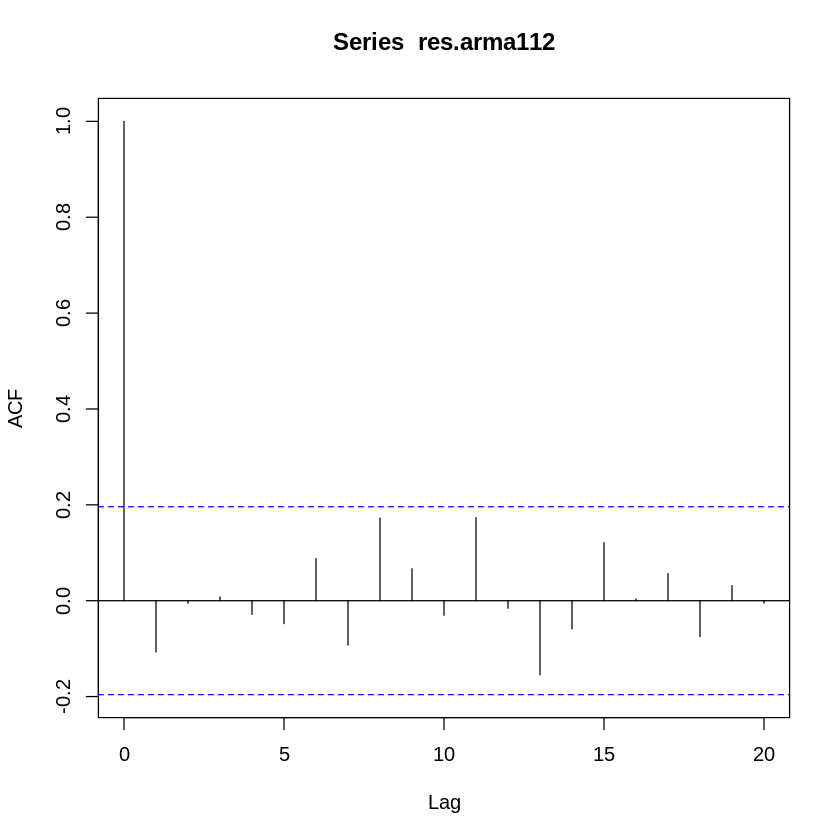

In [ ]:
# Модель 2
# ARMA(1, [12]) - включает первый лаг в AR и только двенадцатый! лаг в MA
# из-за включения только одного из 12 лагов надо сначала задать модель ARMA(1,12)
# после чего добавить условия fixed.pars=list(), 
# что MA коэффициенты с 1-го по 11-й равн нулю.
spec.arma112 = arfimaspec(mean.model=list(armaOrder=c(1,12),
                                          include.mean=FALSE),
                          fixed.pars=list(ma1=0,ma2=0,ma3=0,ma4=0,ma5=0,ma6=0,
                          ma7=0,ma8=0,ma9=0,ma10=0,ma11=0))
fit.arma112 = arfimafit(spec=spec.arma112,data=Y1)
fit.arma112
res.arma112 = fit.arma112@fit$residuals

res.acf2 = acf(res.arma112)
res.acf2

In [ ]:

Box.test(res.arma112,lag=8,type="Ljung-Box")
Box.test(res.arma112,lag=16,type="Ljung-Box")
Box.test(res.arma112,lag=24,type="Ljung-Box")


	Box-Ljung test

data:  res.arma112
X-squared = 6.5857, df = 8, p-value = 0.5819



	Box-Ljung test

data:  res.arma112
X-squared = 15.639, df = 16, p-value = 0.4784



	Box-Ljung test

data:  res.arma112
X-squared = 21.765, df = 24, p-value = 0.5933


In [ ]:


#################################################################
# R по умолчанию дает не совсем привычные информационные критерии
# AIC =−2 ln(L)∕T + 2n∕T
# где −2 ln(L) = T*ln(2𝜋) + T*ln(sigma^2) + (1∕sigma^2)*(SSR)
# STATA и большинство других программ за критерий Акаике принимают
# AIC = T*ln(sum of squared residuals) + 2n
# n - число оцениваемых параметров n = p + q
# T - число используемых наблюдений = число наблюдений - p (число лагов AR) 



In [ ]:
# для модели 1 AR(1)
p1 <- fit.ar1@model[["modelinc"]][["ar"]]
q1 <- fit.ar1@model[["modelinc"]][["ma"]]
n1 <- p1 + q1
T1 = length(Y1)- p1
# для модели 2 ARMA(1, [12])
p2 <- fit.arma112@model[["modelinc"]][["ar"]]
# q - в этом случае число лагов (12) - число фиксированных значений (11)
q2 <- fit.arma112@model[["modelinc"]][["ma"]] - length(spec.arma112@model[["fixed.pars"]])
n2 <- p2 + q2
T2 = length(Y1)- p2

# SSR = sum of resid^2  для наблюдений со второго (1 +p) до последнего
# AIC = T*ln(sum of squared residuals) + 2n
# AIC для модели 1
T1*log(sum(fit.ar1@fit[["residuals"]][(1+p1):100]^2)) + 2*n1
# AIC для модели 2
T2*log(sum(fit.arma112@fit[["residuals"]][(1+p2):100]^2)) + 2*n2

# аналогично для критерия Шварца
# BIC = T*ln(sum of squared residuals) + n*ln(T)
# BIC для модели 1
T1*log(sum(fit.ar1@fit[["residuals"]][(1+p1):100]^2)) + n1*log(T1)
# BIC для модели 2
T2*log(sum(fit.arma112@fit[["residuals"]][(1+p2):100]^2)) + n2*log(T2)
###############################################################



In [ ]:
dev.off()

jpeg 
   3

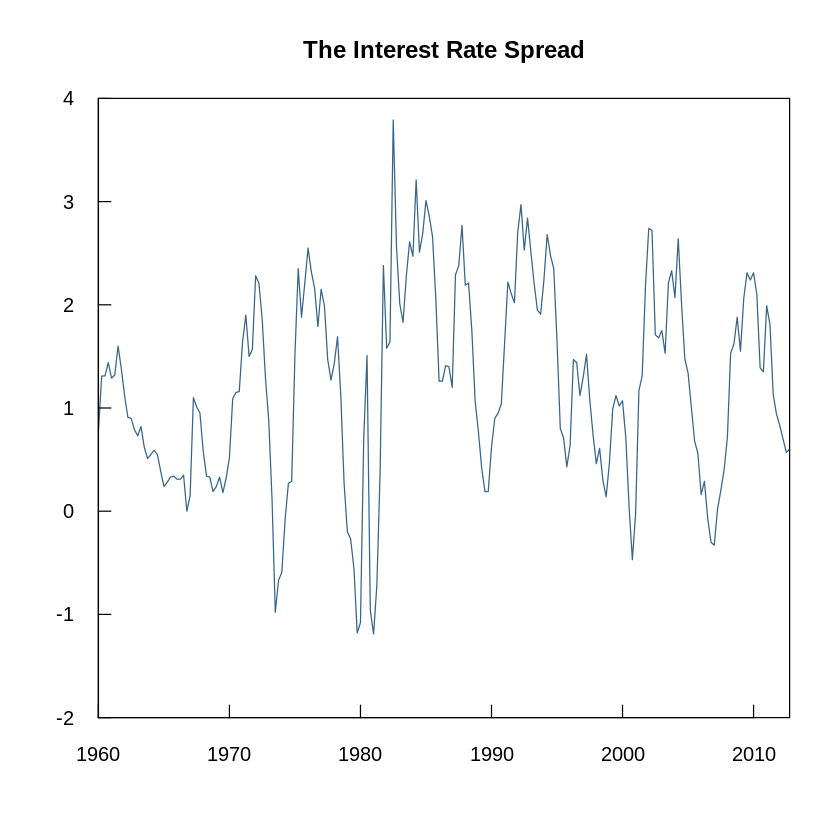

In [ ]:
###############################################################
# Пример (таблица) 2.4 из книги Enders
###############################################################
# Лекция 2, слайды 42-49
###############################################################
# Подбор и проверка адекватности моделей

rm(list=ls())
data = read.csv("quarterly.csv")
data$DATE = as.yearqtr(data$DATE, format="%YQ%q")
data$spread = data$r5-data$Tbill
# график со стлайда 42
#dev.off()
plot(data$DATE,data$spread,type="l",las=1,xaxs="i",yaxs="i",
     xlab="",ylab="",main="The Interest Rate Spread",
     tck=0.02,col="steelblue4",ylim=c(-2,4))


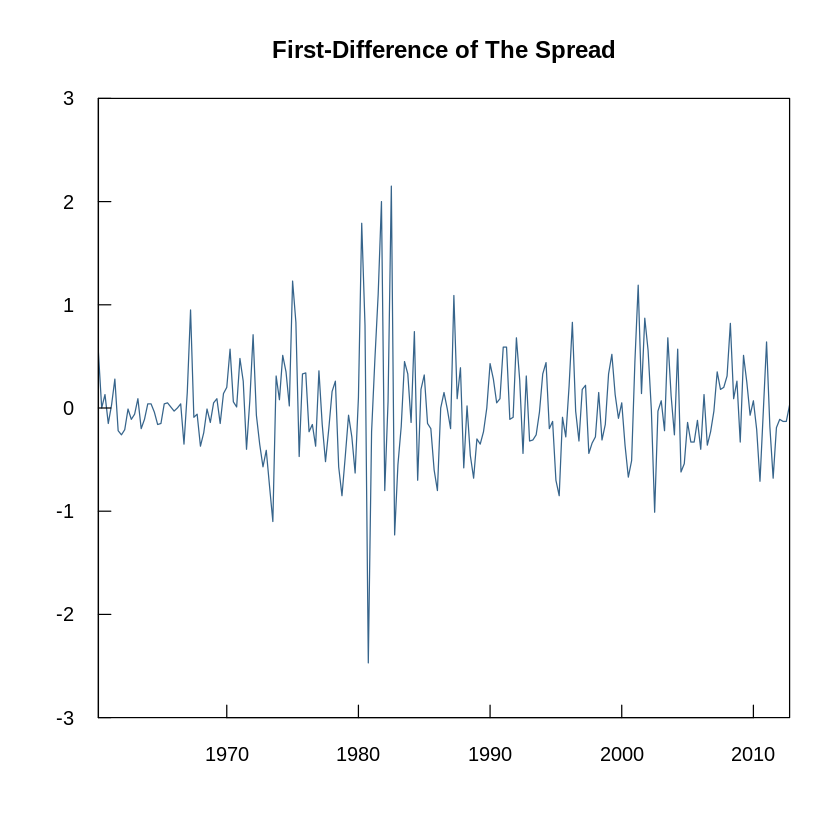

In [ ]:


#dev.off()
plot(data$DATE[-1],diff(data$spread),type="l",las=1,xaxs="i",yaxs="i",
     xlab="",ylab="",main="First-Difference of The Spread",
     tck=0.02,col="steelblue4",ylim=c(-3,3))



Autocorrelations of series ‘data$spread’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.856  0.677  0.549  0.410  0.279  0.149  0.071  0.040 -0.032 -0.127 
    11     12 
-0.198 -0.221 

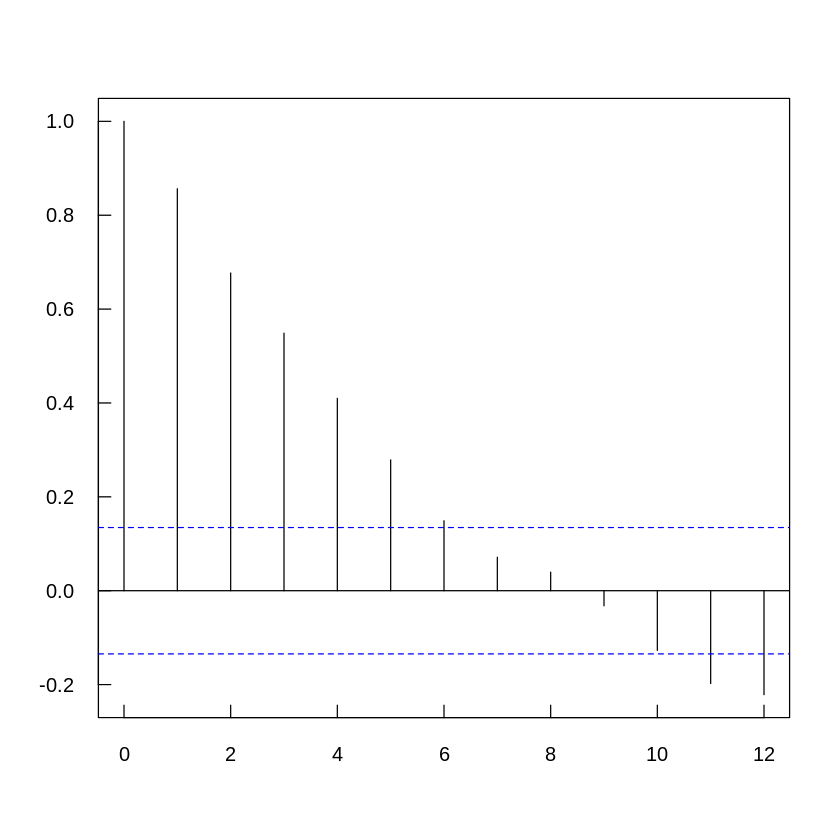


Partial autocorrelations of series ‘data$spread’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.856 -0.212  0.109 -0.181 -0.009 -0.144  0.136  0.011 -0.182 -0.123 -0.044 
    12 
 0.084 

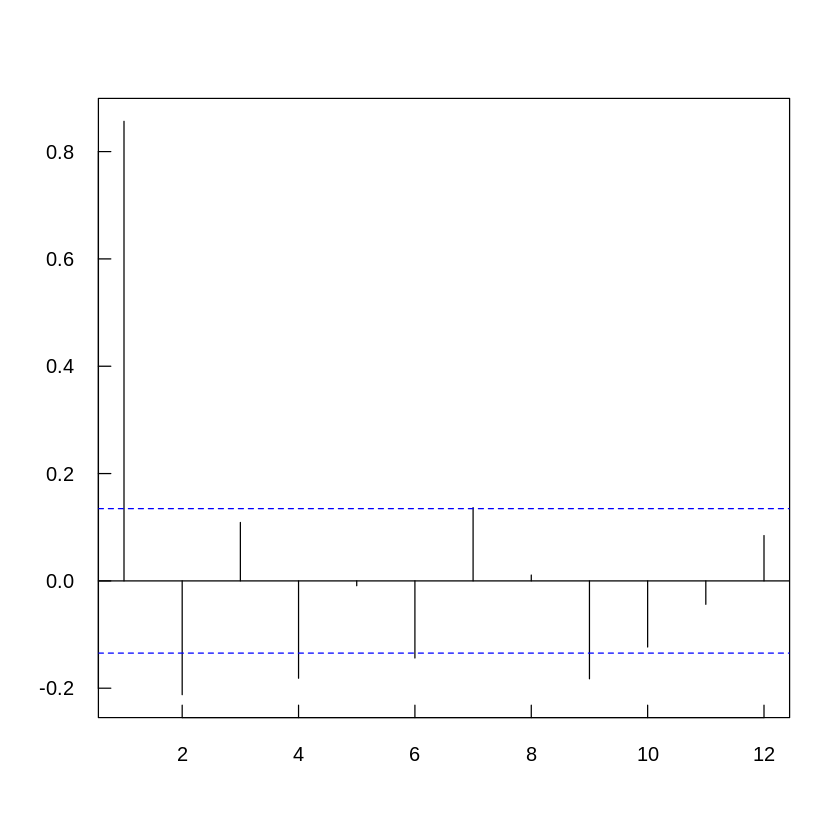

In [ ]:

#dev.off()
#ACF
acf_spred = acf(data$spread,lag=12,tck=.02,xlab="",ylab="",main="",las=1)
acf_spred
# Есть явное убывание - требуется AR
#PACF
pacf_spred=pacf(data$spread,lag=12,tck=.02,xlab="",ylab="",main="",las=1)
pacf_spred

In [ ]:



### слайд 44
# AR(7)
spec.ar7 = arfimaspec(mean.model=list(armaOrder=c(7,0),include.mean=TRUE))
fit.ar7 = arfimafit(spec=spec.ar7,data=data$spread)
fit.ar7
res.ar7 = fit.ar7@fit$residuals
Box.test(res.ar7,lag=4,type="Ljung-Box")
Box.test(res.ar7,lag=8,type="Ljung-Box")
Box.test(res.ar7,lag=12,type="Ljung-Box")
# Ljung-Box тест указывает на адекватность AR(7) модели


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(7,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.24639    0.124005  10.0512 0.000000
ar1     1.11259    0.068363  16.2747 0.000000
ar2    -0.45026    0.100696  -4.4715 0.000008
ar3     0.39592    0.104228   3.7986 0.000146
ar4    -0.29545    0.105739  -2.7942 0.005203
ar5     0.21739    0.104134   2.0876 0.036833
ar6    -0.29680    0.100529  -2.9524 0.003153
ar7     0.13642    0.068440   1.9933 0.046224
sigma   0.45701    0.022194  20.5913 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.24639    0.093718  13.2994 0.000000
ar1     1.11259    0.065099  17.0907 0.000000
ar2    -0.45026    0.134588  -3.3454 0.000822
ar3     0.39592    0.149644   2.6458 0.008151
ar4    -0.29545    0.156437  -1.8886 0.058941
ar5     0.21739    0.1


	Box-Ljung test

data:  res.ar7
X-squared = 0.18971, df = 4, p-value = 0.9958



	Box-Ljung test

data:  res.ar7
X-squared = 5.586, df = 8, p-value = 0.6935



	Box-Ljung test

data:  res.ar7
X-squared = 13.342, df = 12, p-value = 0.3447


In [ ]:


### слайд 45
# AR(6)
spec.ar6 = arfimaspec(mean.model=list(armaOrder=c(6,0),include.mean=TRUE))
fit.ar6 = arfimafit(spec=spec.ar6,data=data$spread)
fit.ar6
res.ar6 = fit.ar6@fit$residuals
Box.test(res.ar6,lag=4,type="Ljung-Box")
Box.test(res.ar6,lag=8,type="Ljung-Box")
Box.test(res.ar6,lag=12,type="Ljung-Box")
# Ljung-Box тест указывает на адекватность AR(6) модели


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(6,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.21755    0.118883  10.2416 0.000000
ar1     1.09210    0.068103  16.0360 0.000000
ar2    -0.42912    0.100813  -4.2565 0.000021
ar3     0.36427    0.103576   3.5170 0.000437
ar4    -0.24783    0.103560  -2.3931 0.016705
ar5     0.16195    0.100564   1.6104 0.107314
ar6    -0.15063    0.067915  -2.2179 0.026559
sigma   0.46070    0.022373  20.5913 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.21755    0.092818  13.1176 0.000000
ar1     1.09210    0.071103  15.3594 0.000000
ar2    -0.42912    0.128399  -3.3420 0.000832
ar3     0.36427    0.138243   2.6350 0.008413
ar4    -0.24783    0.144706  -1.7127 0.086774
ar5     0.16195    0.186253   0.8695 0.384577
ar6    -0.15063    0.1


	Box-Ljung test

data:  res.ar6
X-squared = 0.31871, df = 4, p-value = 0.9886



	Box-Ljung test

data:  res.ar6
X-squared = 11.074, df = 8, p-value = 0.1976



	Box-Ljung test

data:  res.ar6
X-squared = 16.772, df = 12, p-value = 0.1584



*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.16006    0.167805   6.9131 0.000000
ar1     1.04499    0.067033  15.5892 0.000000
ar2    -0.21635    0.067072  -3.2256 0.001257
sigma   0.47753    0.023191  20.5913 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.16006    0.153528   7.5560  0.00000
ar1     1.04499    0.080145  13.0388  0.00000
ar2    -0.21635    0.071924  -3.0080  0.00263
sigma   0.47753    0.064934   7.3541  0.00000

LogLikelihood : -144.121 

Information Criteria
------------------------------------
                   
Akaike       1.3974
Bayes        1.4607
Shibata      1.3967
Hannan-Quinn 1.4230

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                        


	Box-Ljung test

data:  res.ar2
X-squared = 9.0199, df = 4, p-value = 0.0606



	Box-Ljung test

data:  res.ar2
X-squared = 21.818, df = 8, p-value = 0.005264



	Box-Ljung test

data:  res.ar2
X-squared = 29.252, df = 12, p-value = 0.003614


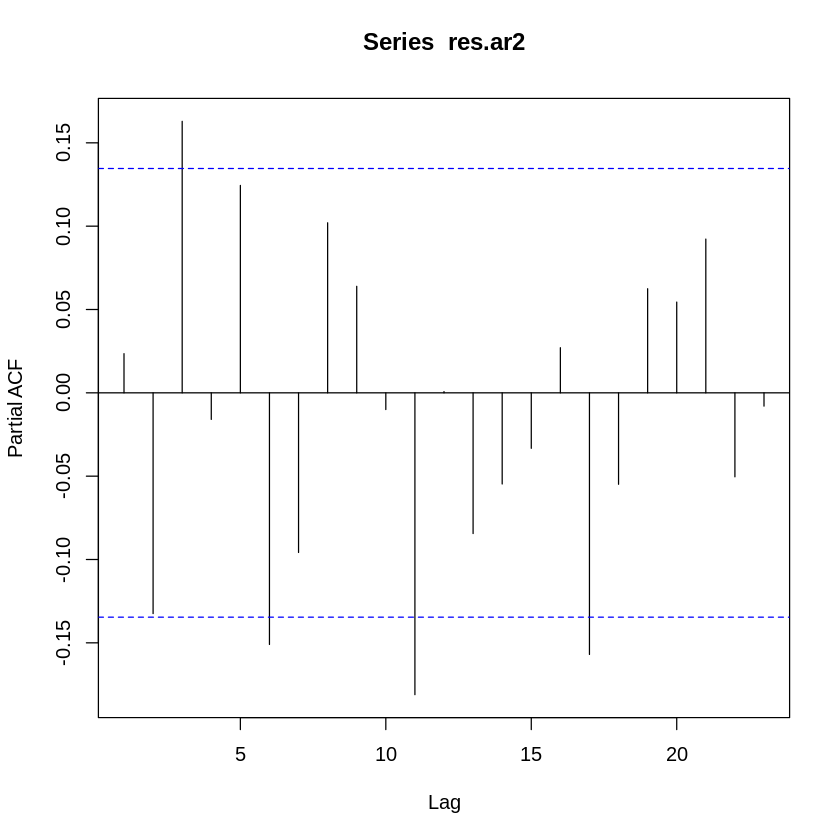

In [ ]:

### слайд 46
# AR(2)
spec.ar2 = arfimaspec(mean.model=list(armaOrder=c(2,0),include.mean=TRUE))
fit.ar2 = arfimafit(spec=spec.ar2,data=data$spread)
fit.ar2
res.ar2 = fit.ar2@fit$residuals
pacf(res.ar2)

Box.test(res.ar2,lag=4,type="Ljung-Box")
Box.test(res.ar2,lag=8,type="Ljung-Box")
Box.test(res.ar2,lag=12,type="Ljung-Box")
# Ljung-Box тест указывает на НЕадекватность AR(2) модели

In [ ]:
### слайд 47
#AR([1,2.7])
spec.ar27 = arfimaspec(mean.model=list(armaOrder=c(7,0),include.mean=TRUE),
                       fixed.pars=list(ar3=0,ar4=0,ar5=0,ar6=0))
fit.ar27 = arfimafit(spec=spec.ar27,data=data$spread)
fit.ar27
res.ar27 = fit.ar27@fit$residuals
Box.test(res.ar27,lag=4,type="Ljung-Box")
Box.test(res.ar27,lag=8,type="Ljung-Box")
Box.test(res.ar27,lag=12,type="Ljung-Box")
# Ljung-Box тест указывает на НЕадекватность AR([1,2.7]) модели


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(7,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu     1.240581    0.124765  9.94337 0.000000
ar1    1.036407    0.068344 15.16453 0.000000
ar2   -0.201526    0.070475 -2.85953 0.004243
ar3    0.000000          NA       NA       NA
ar4    0.000000          NA       NA       NA
ar5    0.000000          NA       NA       NA
ar6    0.000000          NA       NA       NA
ar7   -0.028736    0.036692 -0.78317 0.433525
sigma  0.477315    0.023180 20.59126 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu     1.240581    0.099819 12.42825 0.000000
ar1    1.036407    0.088379 11.72679 0.000000
ar2   -0.201526    0.086316 -2.33475 0.019556
ar3    0.000000          NA       NA       NA
ar4    0.000000          NA       NA       NA
ar5    0.000000       


	Box-Ljung test

data:  res.ar27
X-squared = 8.6353, df = 4, p-value = 0.07089



	Box-Ljung test

data:  res.ar27
X-squared = 22.473, df = 8, p-value = 0.004111



	Box-Ljung test

data:  res.ar27
X-squared = 29.057, df = 12, p-value = 0.003864


In [ ]:
#ARMA(1,1)
spec.arma11 = arfimaspec(mean.model=list(armaOrder=c(1,1),include.mean=TRUE))
fit.arma11 = arfimafit(spec=spec.arma11,data=data$spread)
fit.arma11
res.arma11 = fit.arma11@fit$residuals
Box.test(res.arma11,lag=4,type="Ljung-Box")
Box.test(res.arma11,lag=8,type="Ljung-Box")
Box.test(res.arma11,lag=12,type="Ljung-Box")


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.12456    0.178398   6.3036 0.000000
ar1     0.76479    0.054474  14.0395 0.000000
ma1     0.36506    0.094306   3.8711 0.000108
sigma   0.47417    0.023028  20.5913 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.12456    0.191364   5.8765  0.00000
ar1     0.76479    0.073418  10.4170  0.00000
ma1     0.36506    0.126025   2.8968  0.00377
sigma   0.47417    0.062102   7.6353  0.00000

LogLikelihood : -142.6227 

Information Criteria
------------------------------------
                   
Akaike       1.3832
Bayes        1.4466
Shibata      1.3825
Hannan-Quinn 1.4088

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                       


	Box-Ljung test

data:  res.arma11
X-squared = 6.3332, df = 4, p-value = 0.1756



	Box-Ljung test

data:  res.arma11
X-squared = 18.165, df = 8, p-value = 0.02003



	Box-Ljung test

data:  res.arma11
X-squared = 24.081, df = 12, p-value = 0.01983


In [ ]:



### слайд 48
#ARMA(2,1)
spec.arma21 = arfimaspec(mean.model=list(armaOrder=c(2,1),include.mean=TRUE))
fit.arma21 = arfimafit(spec=spec.arma21,data=data$spread)
fit.arma21
res.arma21 = fit.arma21@fit$residuals
Box.test(res.arma21,lag=4,type="Ljung-Box")
Box.test(res.arma21,lag=8,type="Ljung-Box")
Box.test(res.arma21,lag=12,type="Ljung-Box")








*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.15049    0.171041   6.7264 0.000000
ar1     0.42129    0.118635   3.5511 0.000384
ar2     0.31715    0.112032   2.8309 0.004642
ma1     0.69732    0.088962   7.8385 0.000000
sigma   0.46618    0.022640  20.5913 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.15049    0.148533   7.7457 0.000000
ar1     0.42129    0.117540   3.5842 0.000338
ar2     0.31715    0.098977   3.2043 0.001354
ma1     0.69732    0.086782   8.0354 0.000000
sigma   0.46618    0.058162   8.0153 0.000000

LogLikelihood : -139.0219 

Information Criteria
------------------------------------
                   
Akaike       1.3587
Bayes        1.4379
Shibata      1.3576
Hannan-Quinn 1.3907

Weighted Ljung-Box


	Box-Ljung test

data:  res.arma21
X-squared = 1.1293, df = 4, p-value = 0.8896



	Box-Ljung test

data:  res.arma21
X-squared = 12.329, df = 8, p-value = 0.1371



	Box-Ljung test

data:  res.arma21
X-squared = 19.01, df = 12, p-value = 0.08829


In [ ]:
data$spread

[1]  0.77  1.31  1.31  1.44  1.29  1.32  1.60  1.38  1.12  0.91  0.90  0.79
 [13]  0.73  0.82  0.62  0.51  0.55  0.59  0.55  0.39  0.24  0.28  0.33  0.34
 [25]  0.31  0.31  0.35  0.00  0.15  1.10  1.01  0.95  0.58  0.34  0.33  0.19
 [37]  0.24  0.33  0.18  0.32  0.52  1.09  1.15  1.16  1.64  1.90  1.50  1.57
 [49]  2.28  2.21  1.86  1.29  0.88  0.12 -0.98 -0.67 -0.59 -0.08  0.27  0.29
 [61]  1.52  2.35  1.88  2.21  2.55  2.32  2.16  1.79  2.15  1.99  1.47  1.27
 [73]  1.43  1.69  1.12  0.27 -0.20 -0.27 -0.55 -1.18 -1.08  0.71  1.51 -0.96
 [85] -1.19 -0.72  0.38  2.38  1.58  1.64  3.79  2.56  2.01  1.83  2.28  2.61
 [97]  2.47  3.21  2.51  2.69  3.01  2.86  2.66  2.06  1.26  1.26  1.41  1.40
[109]  1.20  2.29  2.38  2.77  2.19  2.21  1.75  1.07  0.77  0.42  0.19  0.19
[121]  0.62  0.90  0.95  1.04  1.63  2.22  2.11  2.02  2.70  2.97  2.53  2.84
[133]  2.52  2.21  1.95  1.91  2.24  2.68  2.48  2.35  1.65  0.80  0.71  0.43
[145]  0.64  1.47  1.44  1.12  1.30  1.52  1.08  0.74  0.46  0.61  0.30  0.14
[157]  0.47  0.99  1.12  1.02  1.07  0.71  0.04 -0.47 -0.02  1.17  1.31  2.18
[169]  2.74  2.72  1.71  1.68  1.75  1.53  2.21  2.33  2.07  2.64  2.02  1.48
[181]  1.34  1.01  0.68  0.56  0.16  0.29 -0.07 -0.30 -0.33  0.02  0.20  0.40
[193]  0.71  1.53  1.62  1.88  1.55  2.06  2.31  2.24  2.31  2.10  1.39  1.35
[205]  1.99  1.81  1.13  0.94  0.83  0.70  0.57  0.60

In [ ]:
#ARMA(2,[1,7])
spec.arma27 = arfimaspec(mean.model=list(armaOrder=c(2,7),include.mean=TRUE),
                         fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))
fit.arma27 = arfimafit(spec=spec.arma27,data=data$spread,solver="Nelder-Mead")
fit.arma27
res.arma27 = fit.arma27@fit$residuals
Box.test(res.arma27,lag=4,type="Ljung-Box")
Box.test(res.arma27,lag=8,type="Ljung-Box")
Box.test(res.arma27,lag=12,type="Ljung-Box")

ERROR: ignored

In [ ]:
###############################################################
# Пример 4.4 (рисунок) из книги Enders
###############################################################
# Лекция 2, слайды 77 и 89
###############################################################
# Выбор способа детрендирования
### Differencing or detrending
rm(list=ls())
data = read.csv("rgdp.csv", header=TRUE)
data$DATE=as.Date(as.character(data$DATE))



Call:
lm(formula = data$RGDP ~ t + I(t^2) + I(t^3))

Residuals:
    Min      1Q  Median      3Q     Max 
-637.07 -143.98   -0.96  149.50  637.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.890e+03  6.833e+01  27.665  < 2e-16 ***
t            9.108e+00  2.229e+00   4.087 5.84e-05 ***
I(t^2)       1.699e-01  1.952e-02   8.701 3.83e-16 ***
I(t^3)      -1.000e-04  4.843e-05  -2.065   0.0399 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.6 on 260 degrees of freedom
Multiple R-squared:  0.9947,	Adjusted R-squared:  0.9946 
F-statistic: 1.614e+04 on 3 and 260 DF,  p-value: < 2.2e-16


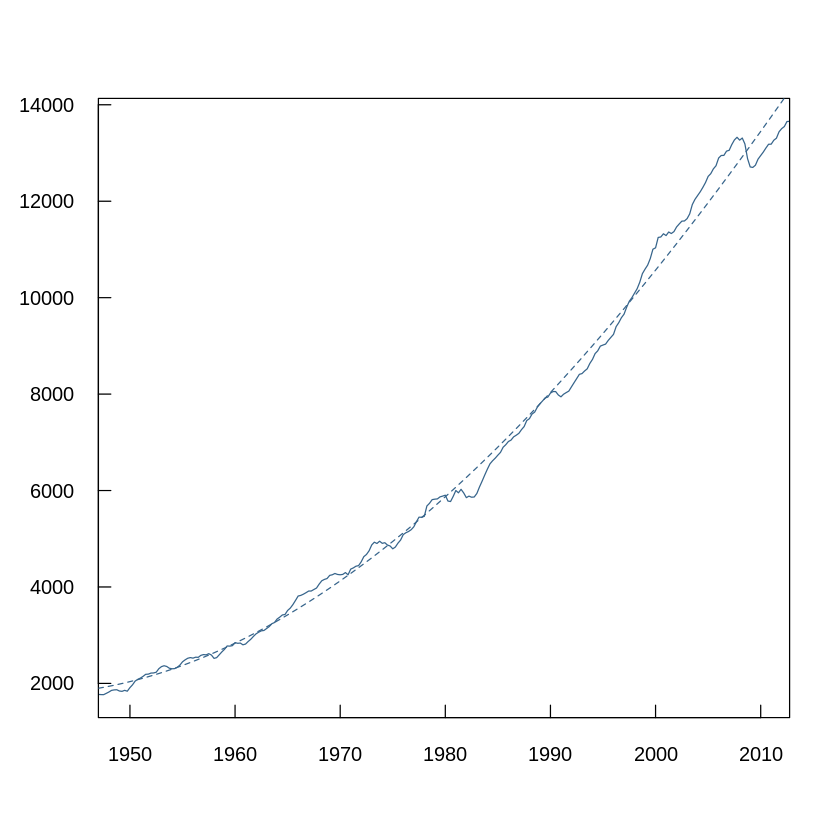

In [ ]:

plot(data$DATE,data$RGDP,type="l",xaxs="i",las=1,xlab="",ylab="",col="steelblue4",tck=0.02)
t = 1:nrow(data)
lm1 = lm(data$RGDP~t+I(t^2)+I(t^3))
summary(lm1)


lines(data$DATE,lm1$fitted.values,col="steelblue4",lty=2)


In [ ]:
dlgdp = diff(log(data$RGDP))
# embed(ряд, N) команда строит матрицу вида (Yt,Yt-1, Yt-2,...)
# в данном случае - первый столбец - исходные данные dlgdp, а второй - их первый лаг
X = embed(dlgdp,2)
lm2 = lm(X[,1]~X[,-1])
summary(lm2)



Call:
lm(formula = X[, 1] ~ X[, -1])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028447 -0.004576 -0.000031  0.005370  0.038190 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0049140  0.0007229   6.797 7.26e-11 ***
X[, -1]     0.3705749  0.0575612   6.438 5.81e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009174 on 260 degrees of freedom
Multiple R-squared:  0.1375,	Adjusted R-squared:  0.1342 
F-statistic: 41.45 on 1 and 260 DF,  p-value: 5.81e-10


In [ ]:



# тоже самое можно получить чуть более понятным способом
# обозначить dlgdp как временной ряд
dlgdp <- ts(dlgdp, start=c(1947, 2), frequency=4)
# применить dynlm - для динамических линейных моделей с лаговым операторов L(x,число лагов)
lm3 = dynlm(dlgdp ~ L(dlgdp,1) + 1)
summary(lm3)



Time series regression with "ts" data:
Start = 1947(3), End = 2012(4)

Call:
dynlm(formula = dlgdp ~ L(dlgdp, 1) + 1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028447 -0.004576 -0.000031  0.005370  0.038190 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0049140  0.0007229   6.797 7.26e-11 ***
L(dlgdp, 1) 0.3705749  0.0575612   6.438 5.81e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009174 on 260 degrees of freedom
Multiple R-squared:  0.1375,	Adjusted R-squared:  0.1342 
F-statistic: 41.45 on 1 and 260 DF,  p-value: 5.81e-10


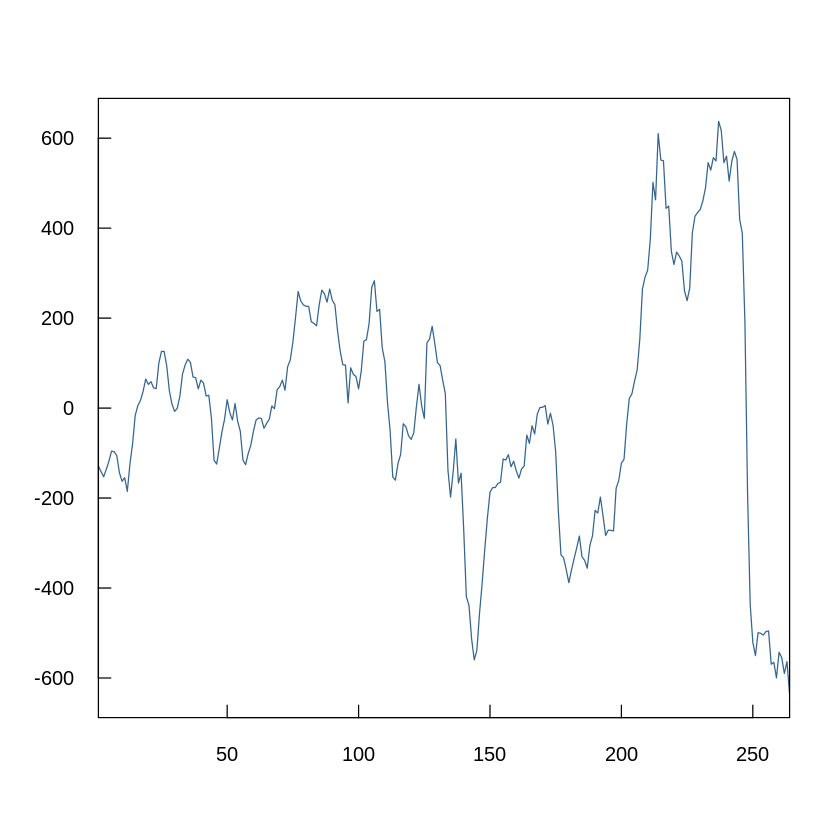

In [ ]:
# проверка адекватности таких моделей - проверка свойств белого шума для ошибок
# график ошибок вычитания тренда
plot(lm1$residuals,type="l",las=1,xaxs="i",xlab="",ylab="",tck=0.02,col="steelblue4")
# в конце периода ошибки стали больше

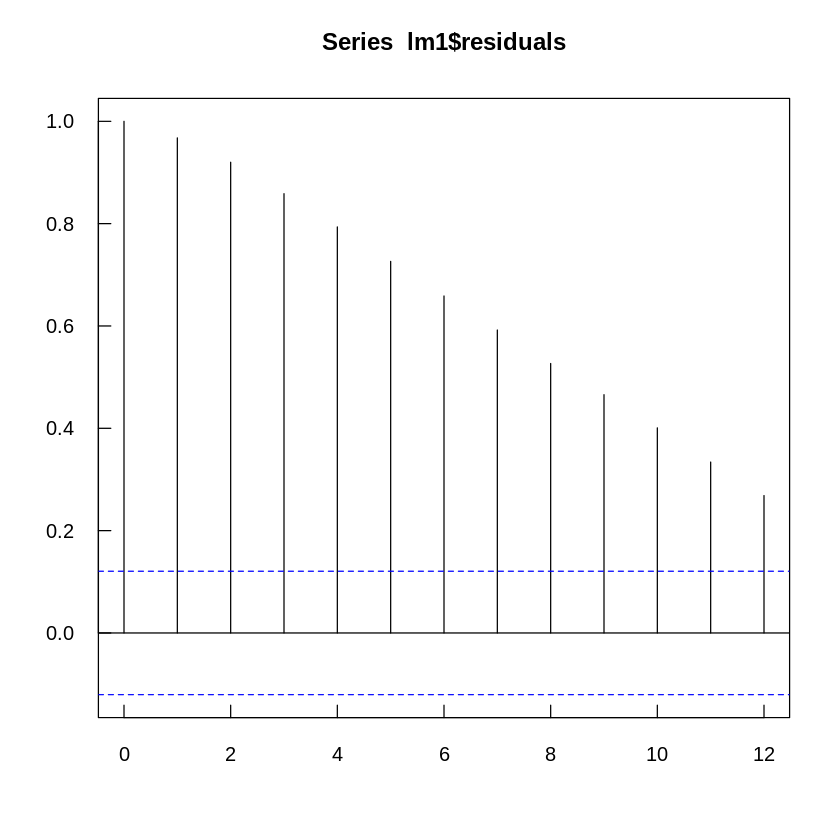

In [ ]:
#Автокорреляция
acf1 = acf(lm1$residuals,lag=12,xlab="",ylab="",las=1,tck=.02)
# выявляется очевидная автокорреляция - ошибки не являются белым шумом
# значит модель неадекватна


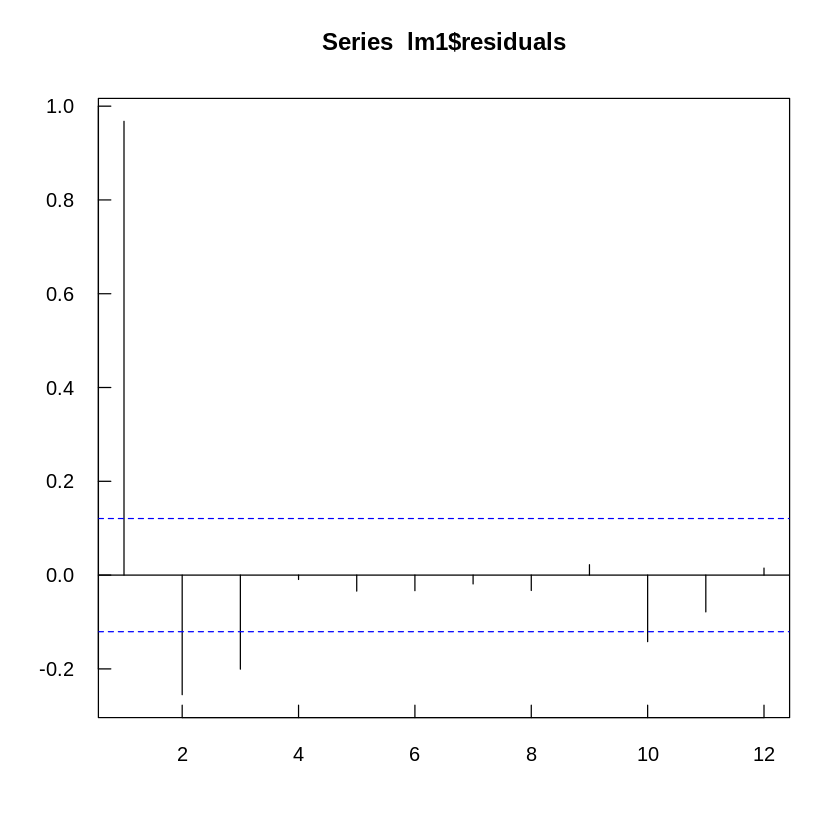

In [ ]:
# частная автокорреляция
pacf1 = pacf(lm1$residuals,lag=12,xlab="",ylab="",las=1,tck=.02)

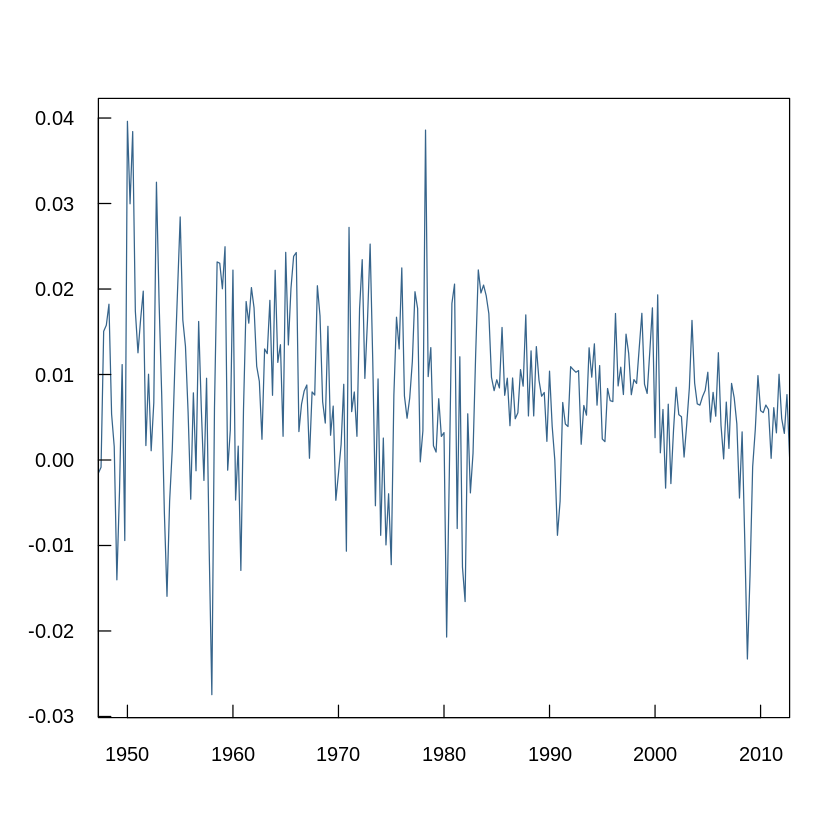

In [ ]:
# график ошибок модели dlgdp =  const + L.dlgdp 
plot(dlgdp,type="l",las=1,xaxs="i",xlab="",ylab="",tck=0.02,col="steelblue4")

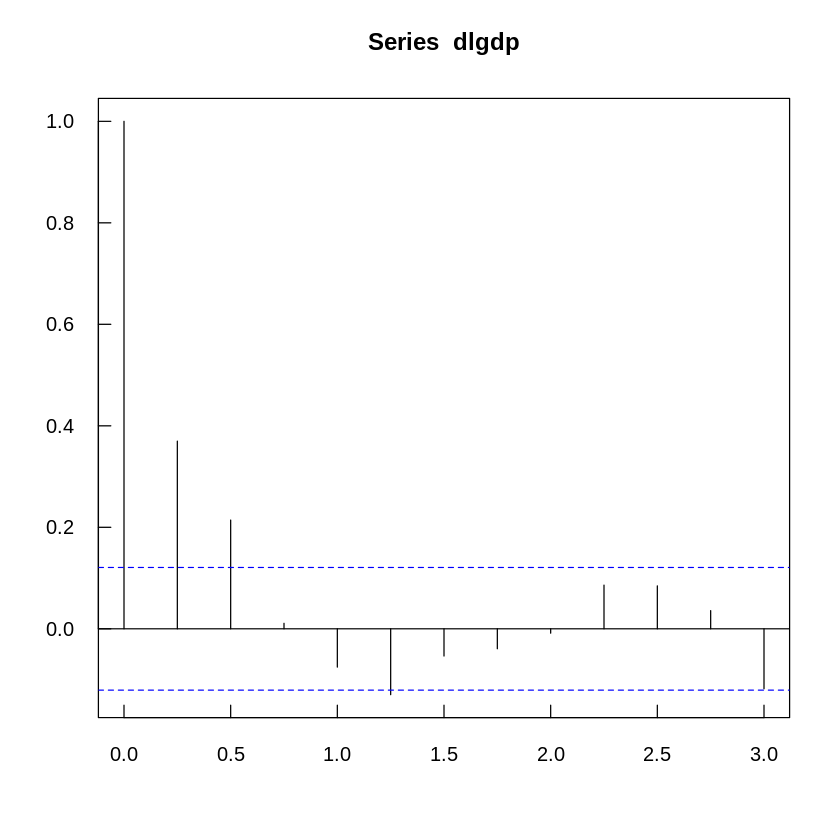

In [ ]:
#Автокорреляция
acf1 = acf(dlgdp,lag=12,xlab="",ylab="",las=1,tck=.02)
# только первые два лага условно значимы

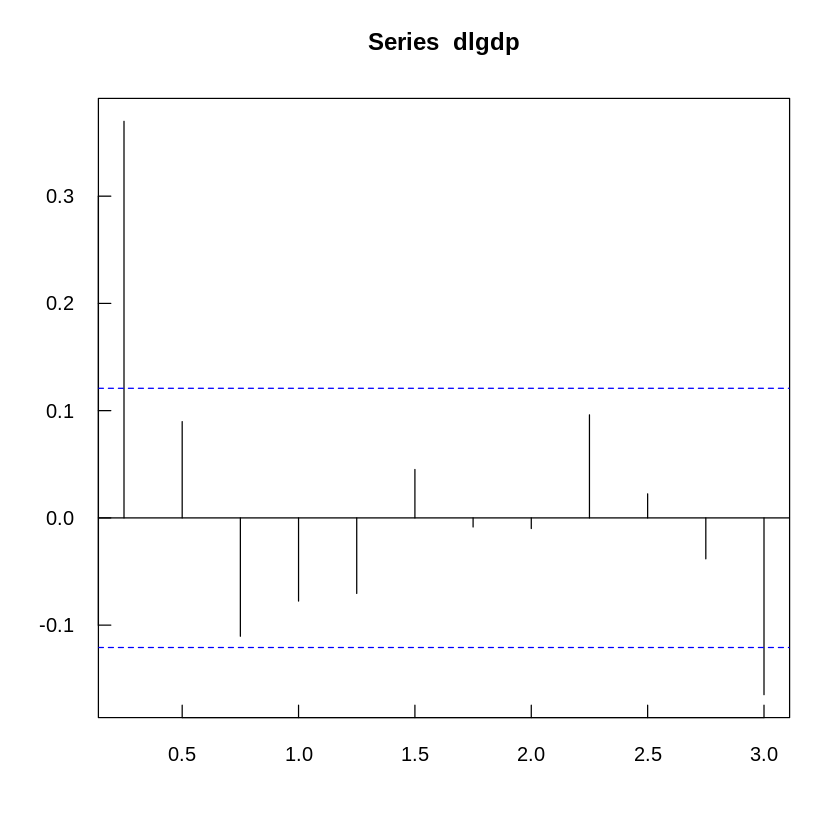

In [ ]:
# частная автокорреляция
pacf1 = pacf(dlgdp,lag=12,xlab="",ylab="",las=1,tck=.02)
#нет явных противоречий с гипотезой белого шума ошибок